<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Assignment/Assignment221104_text4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 08 텍스트 분석**
___


## **06 토픽 모델링(Topic Modeling)-20 뉴스그룹**
___
- **토픽 모델링(Topic Modeling)** : 문서 집합에 숨어 있는 주제를 찾아내는 것.
- 많은 양의 문서가 있을 때 이 문서를 다 읽고 핵심 주제를 찾는 것은 많은 시간이 소모된다. 그러나 머신러닝 기반의 토픽 모델링을 적용한다면, 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출해 효과적으로 중요 주제를 찾아낼 수 있다.
- 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 **LSA(Latent Semantic Analysis)**와 **LDA(Latent Dirchlet Allocation)**이다. 이 절에서는 두 가지 중 LDA만 다룰 예정이다.
  - 이때, 토픽 모델링에 사용되는 LDA는 차원 축소의 LDA와 약어만 다른 알고리즘이므로 유의한다.
- 토픽 모델링은 앞의 텍스트 분류에서 소개한 20 뉴스그룹 데이터셋을 이용해 적용한다.



In [ ]:
# load dataset
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)
print('target 클래스의 이름들 \n',news_data.target_names)

target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


- 20 뉴스그룹 데이터셋은 위와 같이 20가지의 주제를 가진 뉴스 그룹의 데이터를 가지고 있다. 이 중 모토사이클, 야구, 그래픽스, 윈도우, 중동, 기족교, 전자공학, 의학 8개의 주제를 추출하고 이 주제에 해당하는 텍스트에 LDA 기반의 토픽 모델링을 적용한다.
- 사이킷런은 LDA(Latent Dirichler Allocation) 기반의 토픽 모델링을 `LatentDirichlerAllocation` 클래스로 제공한다.
- 먼저 LDA 토픽 모델링을 위해, `fetch_20newsgroups()` API의 `categories` 파라미터를 통해 필요한 주제만 추출하고, 추출된 텍스트를 Count 기반으로 벡터화한다.
  + LDA는 Count 기반의 벡터화만 사용한다.
  + `max_features=1000`으로 word 피처의 개수를 제한하고, `ngram_range`는 (1,2)로 설정하고 피처 벡터화 한다.

In [ ]:
# import packages
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

In [ ]:
# 위의 cats 변수로 기재된 주제만 추출
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), categories=cats, random_state=0)

In [ ]:
# Count 기반 벡터화
# LDA 는 Count기반의 Vectorizer만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2)) 
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


- `CountVectorizer` 객체 변수인 `feat_vect`는 위의 결과와 같이 7862개의 문서와 1000개의 피처로 구성된 행렬 데이터이다.
- 이렇게 피처 벡터화된 데이터셋을 기반으로 LDA 토픽 모델링을 수행한다.
- 토픽의 개수는 위의 뉴스그룹에서 추출한 주제와 동일하게 8개로 정한다.
  + `LatentDirichletAllocation` 클래스의 `n_components` 파라미터를 이용하여 토픽 개수를 조정할 수 있다.

In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- `LatentDirichletAllocation` 객체는 `components_` 속성값을 가지고 있는데, `components_` 는 개별 토픽별로 하나의 word 피처가 각 토픽에 할당된 개수이다. 높을수록 해당 word 피처는 그 토픽의 중심 word가 된다.

In [ ]:
print(lda.components_.shape)

(8, 1000)


In [ ]:
lda.components_

array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- `components_`는 8개의 row와 1000개의 column으로 이루어져 있으며, 8개의 토픽별로 각 word 피처와 해당 토픽의 연관도 값을 가지고 있다.
- `display_topics()` 함수를 만들어 각 토픽별로 연관도가 높은 순으로 Word를 나열해보자.

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

In [ ]:
# CountVectorizer객체 내의 전체 word들의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


## **08 문서 유사도**
___

### | **문서 유사도 측정 방법-코사인 유사도**
- 문서와 문서 간의 유사도 비교는 일반적으로 **코사인 유사도(Cosine Similarity)**를 사용한다.
- 코사인 유사도는 **벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지**를 기준으로 계산한다. 즉, 코사인 유사도는 두 벡터 사이의 사잇각을 구해, 얼마나 유사한지 수치로 적용한 것이다.


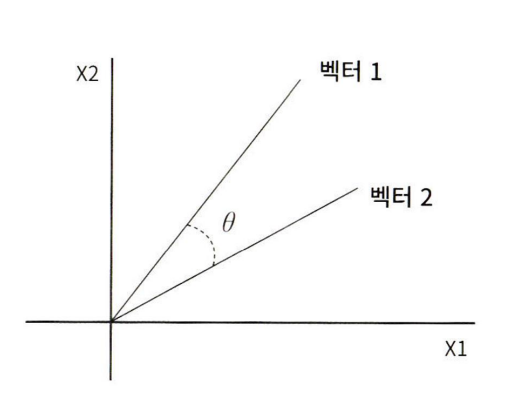

### | **두 벡터 사잇각**
- 두 벡터의 사잇각에 따라 다음과 같이 관계를 정의할 수 있다.
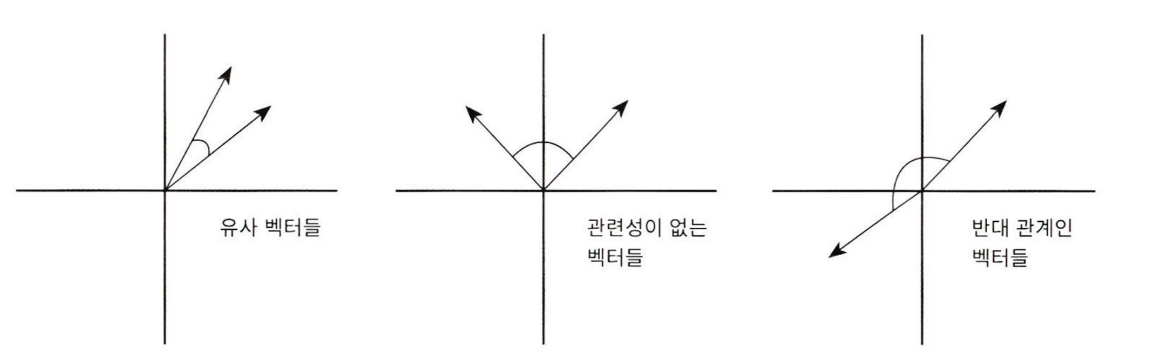

- 두 벡터 A와 B의 코사인 값, 즉 유사도는 두 벡터의 내적이 아래와 같다는 점을 이용하여,
$$A*B = ||A||||B|| cos\theta$$
- 다음과 같이 구할 수 있다.
$$similarity = cos\theta = \frac{A \cdot B}{||A||||B||} = \frac{\sum^{n}_{i=1}A_i B_i}{\sqrt{\sum^{n}_{i=1}A_i^2} \sqrt{\sum^{n}_{i=1}B_i^2}}$$
- 코사인 유사도의 장점은 다음과 같다.
  1. 문서를 피처 벡터화하면 차원이 매우 많은 희소 행렬이 되기 쉬운데, 희소행렬에서 문서와 문서 벡터 간의 **크기**에 기반한 유사도 지표는 정확도가 떨어지기 쉽다.
  2. 문서가 매우 긴 경우 단어의 빈도 수도 더 많으니, 빈도수만 기준으로 삼으면 공정한 비교를 할 수 없다.
    + 예를 들어, A 문서에서 '머신러닝'이라는 단어가 5번 언급되고, B 문서에서 3번 언급된다고, A 문서가 머신러닝과 더 밀접하다고 판단할 수 없기 때문이다. 
- 이제 간단한 문서에 대해 서로 간의 문서 유사도(=코사인 유사도)를 구해보자. 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 `cos_similarity()` 함수를 작성한다.

In [ ]:
import numpy as np

In [ ]:
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

- `doc_list`로 정의된 3개의 간단한 문서의 유사도를 비교한다. 먼저, 문서를 TF-IDF 벡터화한다.

In [ ]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
tfidf_vect_simple = TfidfVectorizer() 
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


- 반환된 행렬은 희소 행렬이므로, `cos_similarity()` 함수의 입력 인자인 `array`로 만들기 위해 밀집 행렬로 변환한 뒤 다시 배열로 변환해야 한다.

In [ ]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

In [ ]:
# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

In [ ]:
# 첫번째 문장과 두번째 문장의 피처 벡터로 두개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


- 첫 번째 문장과 두 번재 문장의 코사인 유사도는 0.402이다. 다음으로 첫 번째 문장과 세 번째 문장, 그리고 두 번째 문장과 세 번째 문장의 유사도도 측정해보자.

In [ ]:
# 첫 번재 문장과 세 번째 문장의 유사도
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )

print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404


In [ ]:
# 두 번째 문장과 세 번째 문장의 유사도
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )

print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 2, 문장 3 Cosine 유사도: 0.456


- 사이킷런은 코사인 유사도를 계산해주는 `sklearn.metrics.pairwise.cosine_similarity()` 함수를 제공한다. 이 함수는 비교 기준이 되는 문서의 피처 행렬과 비교되는 문서의 피처 행렬을 입력 받는다.
- `cosine_similarity()` 함수는 희소 행렬, 밀집 행렬 모두 적용 가능하며, 행렬과 배열 모두 적용 가능하다. 따라서 별도의 변환 작업이 필요 없다.
- 이 함수를 이용하여 첫 번째 문서를 기준으로 자기 자신을 포함하여 3개의 문서의 유사도를 각각 구해보자.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


- 첫 번째 유사도 값인 1은 자기 자신에 대한 유사도 값이다. 

In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:]) # 자기 자신과의 유사도 생략
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


- `cosine_similarity()`는 pair로 코사인 유사도 값을 제공할 수 있다. 모든 개별 문서끼리의 코사인 유사도 값을 계산해보자.

In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]


In [ ]:
print('shape:',similarity_simple_pair.shape)

shape: (3, 3)


### | **Opinion Review 데이터셋을 이용한 문서 유사도 측정**
- Opinion Review 데이터셋을 이용하여, 이들 문서 간의 유사도를 측정해보자.
- 데이터셋을 DataFrame으로 로드하고, 문서 군집화를 적용한다.

In [ ]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
path = r'/content/drive/MyDrive/2022-2 ESAA/Data/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

In [ ]:
for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

In [ ]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

- 호텔을 주제로 군집화된 문서를 이용하여, 특정 문서와 다른 문서 간의 유사도를 알아본다.
- 문서를 피처 벡터화해 변환하면, 문서 내 단어(Word)에 출현 빈도와 같은 값을 부여해 단어 피처의 값으로 벡터화된다. 이렇게 각 문서가 피처 벡터화 된 데이터를 `cosine_simularity()`를 이용하여, 상호 비교해 유사도를 확인해보자.
- 먼저 호텔을 주제로 군집화된 데이터를 추출한 뒤, 이에 해당하는 `TfidVectorizer`의 데이터를 추출한다. 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터가 호텔로 클러스터링된 데이터
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes) 

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([0, 5, 7, 8, 11, 21, 24, 28, 31, 32, 33, 34, 43, 45, 46, 48], dtype='int64')


In [ ]:
# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

##### 비교 기준 문서명  /content/drive/MyDrive/2022-2 ESAA/Data/topics/location_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.09201799 0.11008256 0.0866001  0.05846178 0.12007824
  0.66839337 0.26167388 0.30950894 0.22029855 0.26090251 0.16717527
  0.23179149 0.17331798 0.19000232 0.2398459 ]]


- 유사도가 높은 순으로 이를 정렬하고, 시각화해보자.

Text(0.5, 1.0, '/content/drive/MyDrive/2022-2 ESAA/Data/topics/location_bestwestern_hotel_sfo')

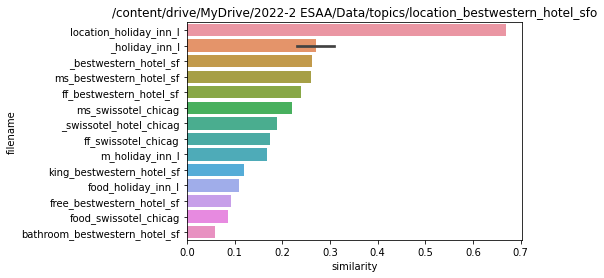

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = (document_df.iloc[hotel_sorted_indexes]['filename']).apply(lambda x : x.strip('/content/drive/MyDrive/2022-2 ESAA/Data/topics/'))
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

## **09 한글 텍스트 처리-네이버 영화 평점 감성 분석**
___
- 이번 절에서는 네이버 영화 평점 데이터를 기반으로 감성 분석을 적용해보자. 
- 한글 NLP 처리에서 주의할 점과 대표적인 파이썬 기반 한글 형태소 패키지인 KoNLPy에 대해 알아볼 예정이다.

### | **한글 NLP 처리의 어려움**
- **띄어쓰기**와 **조사** 때문에, 일반적으로 한글 NLP 처리는 영어 등의 라틴어 처리보다 어렵다.
  + 영어는 띄어쓰기를 잘못하면 잘못된 혹은 없는 단어로 인식하지만 한글은 의미가 왜곡되기 때문이다.
  + 조사의 경우 워낙 경우의 수가 많아, 어근 추출 등의 전처리 시 제거하기가 어렵다.
- 한글의 과학성은 세계적으로 인정받고 있지만, 위의 문제로 인해 상대적으로 라틴어 계열의 언어보다 NLP 처리가 어렵다.

### | **KoNLPy 소개**
- KoNLPy는 파이썬의 대표적인 한글 형태소 패키지이다.
- **형태소 분석(Norphological analysis)** : 단어를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업 

### | **데이터 로딩**
- 이제 네이버 영화 리뷰 데이터를 로드하고, 감성 분석을 진행해보자.



In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


- 학습 데이터셋의 0가 1의 Label 값 비율을 살펴보자. 1이 긍정, 0이 부정 감성이다.

In [ ]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

- Label값이 균등하게 분포하고 있다.
- `train_df`의 경우, 리뷰 텍스트를 가지는 'document' 컬럼에 Null이 일부 존재하므로, 이 값을 공백으로 변환한다.
- 문자가 아닌 수자의 경우, 단어적인 의미가 부족하므로, 파이썬의 정규 표현식 모듈인 `re`를 이용하여, 역시 공백으로 변환한다.
- 테스트 데이터셋도 동일한 과정을 수행한다.

In [ ]:
import re

train_df = train_df.fillna(' ')

# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

In [ ]:
# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

In [ ]:
# id 컬럼 삭제
train_df.drop('id', axis=1, inplace=True) 
test_df.drop('id', axis=1, inplace=True)

- 이제 각 문장을 한글 형태소 분석을 통해 형태소 단위로 토큰화 한 후, TF-IDF 벡터화를 진행해보자.
- 한글 형태소 엔진은 SNS 분석에 적합한 `Twitter` 클래스를 이용한다.
  + `Twitter` 객체의 `morphs()` 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단위로 토큰화해 list 객체로 반환한다.
  + 이를 이용하여, 문장을 형태소 단위로 반환하는 별도의 tokenizer 함수 `tw_tokenizer()`를 생성해보자.

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 62.8 MB/s 


In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()

def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


- 사이킷런의 `TfidVectorizer`를 이용하여, TF-IDF 피처 모델을 생성한다. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


- 로지스틱 회귀를 이용하여 분류 기반의 감성 분석을 수행한다. 로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV를 이용한다.

In [ ]:
# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


- 이제 테스트셋을 이용하여 최종 감석 분석 예측을 수행해보자.

In [ ]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))

Logistic Regression 정확도:  0.86186
